In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

In [32]:
import pandas as pd
train_data=pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")

In [33]:
train_data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64

In [34]:
from sklearn.impute import KNNImputer, SimpleImputer
knn_imputer = KNNImputer(n_neighbors=5)
train_data['sii'] = knn_imputer.fit_transform(train_data[['sii']])

In [35]:
train_data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                          0
Length: 82, dtype: int64

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['SDS-Season']=le.fit_transform(train_data['SDS-Season'])
train_data['PreInt_EduHx-Season']=le.fit_transform(train_data['PreInt_EduHx-Season'])
train_data['PAQ_C-Season']=le.fit_transform(train_data['PAQ_C-Season'])
train_data['PCIAT-Season']=le.fit_transform(train_data['PCIAT-Season'])
train_data['PAQ_A-Season']=le.fit_transform(train_data['PAQ_A-Season'])
train_data['BIA-Season']=le.fit_transform(train_data['BIA-Season'])
train_data['FGC-Season']=le.fit_transform(train_data['FGC-Season'])
train_data['Fitness_Endurance-Season']=le.fit_transform(train_data['Fitness_Endurance-Season'])
train_data['Physical-Season']=le.fit_transform(train_data['Physical-Season'])
train_data['CGAS-Season']=le.fit_transform(train_data['CGAS-Season'])
train_data['Basic_Demos-Enroll_Season']=le.fit_transform(train_data['Basic_Demos-Enroll_Season'])
train_data['id']=le.fit_transform(train_data['id'])


In [38]:
train_data=train_data.drop(columns=['PCIAT-PCIAT_01','PCIAT-PCIAT_02','PCIAT-PCIAT_03','PCIAT-PCIAT_04','PCIAT-PCIAT_05','PCIAT-PCIAT_06','PCIAT-PCIAT_07','PCIAT-PCIAT_08','PCIAT-PCIAT_09','PCIAT-PCIAT_10','PCIAT-PCIAT_11','PCIAT-PCIAT_12','PCIAT-PCIAT_13','PCIAT-PCIAT_14','PCIAT-PCIAT_15','PCIAT-PCIAT_16','PCIAT-PCIAT_17','PCIAT-PCIAT_18','PCIAT-PCIAT_19','PCIAT-PCIAT_20','PCIAT-PCIAT_Total','PCIAT-Season'])

In [39]:
train_data['SDS']=(train_data['SDS-Season']+train_data['SDS-SDS_Total_Raw']+train_data['SDS-SDS_Total_T'])/3

In [40]:
train_data=train_data.drop(columns=["SDS-Season",'SDS-SDS_Total_Raw','SDS-SDS_Total_T'])

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   int64  
 1   Basic_Demos-Enroll_Season               3960 non-null   int64  
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             3960 non-null   int64  
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3960 non-null   int64  
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [42]:
train_data['BIA-BIA']=(train_data['BIA-Season']+train_data['BIA-BIA_TBW']+train_data['BIA-BIA_SMM']+train_data['BIA-BIA_LST']+train_data['BIA-BIA_LDM']+train_data['BIA-BIA_ICW']+train_data['BIA-BIA_Frame_num']+train_data['BIA-BIA_Fat']+train_data['BIA-BIA_FMI']+train_data['BIA-BIA_FFM']+train_data['BIA-BIA_ECW']+train_data['BIA-BIA_DEE']+train_data['BIA-BIA_BMR']+train_data['BIA-BIA_BMI']+train_data['BIA-BIA_BMC']+train_data['BIA-BIA_Activity_Level_num']+train_data['BIA-BIA_FFMI'])/17

In [43]:
train_data=train_data.drop(columns=['BIA-Season','BIA-BIA_TBW','BIA-BIA_SMM','BIA-BIA_LST','BIA-BIA_LDM','BIA-BIA_ICW','BIA-BIA_Frame_num','BIA-BIA_Fat','BIA-BIA_FMI','BIA-BIA_FFM','BIA-BIA_ECW','BIA-BIA_DEE','BIA-BIA_BMR','BIA-BIA_BMI','BIA-BIA_BMC','BIA-BIA_Activity_Level_num'])

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   int64  
 1   Basic_Demos-Enroll_Season               3960 non-null   int64  
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             3960 non-null   int64  
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3960 non-null   int64  
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [45]:
train_data['PAQ_A']=(train_data['PAQ_A-Season']+train_data['PAQ_A-PAQ_A_Total'])/2
train_data['PAQ_C']=(train_data['PAQ_C-Season']+train_data['PAQ_C-PAQ_C_Total'])/2

In [46]:
train_data=train_data.drop(columns=["PAQ_A-Season",'PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total','PAQ_C-Season'])

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   int64  
 1   Basic_Demos-Enroll_Season               3960 non-null   int64  
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             3960 non-null   int64  
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3960 non-null   int64  
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [48]:
train_data['FGC-FGC']=(train_data['FGC-FGC_TL_Zone']+train_data['FGC-FGC_TL']+train_data['FGC-FGC_SRR_Zone']+train_data['FGC-FGC_SRR']+train_data['FGC-FGC_SRL_Zone']+train_data['FGC-FGC_SRL']+train_data['FGC-FGC_PU_Zone']+train_data['FGC-FGC_PU']+train_data['FGC-FGC_GSD_Zone']+train_data['FGC-FGC_GSD']+train_data['FGC-FGC_GSND_Zone']+train_data['FGC-FGC_GSND']+train_data['FGC-FGC_CU_Zone']+train_data['FGC-FGC_CU']+train_data['FGC-Season'])/15

In [49]:
train_data=train_data.drop(columns=['FGC-FGC_CU_Zone','FGC-Season','FGC-FGC_CU','FGC-FGC_TL_Zone','FGC-FGC_TL','FGC-FGC_SRR_Zone','FGC-FGC_SRR','FGC-FGC_SRL_Zone','FGC-FGC_SRL','FGC-FGC_PU_Zone','FGC-FGC_PU','FGC-FGC_GSD_Zone','FGC-FGC_GSD','FGC-FGC_GSND_Zone','FGC-FGC_GSND'])

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   int64  
 1   Basic_Demos-Enroll_Season               3960 non-null   int64  
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             3960 non-null   int64  
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3960 non-null   int64  
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [51]:
train_data=train_data.drop(columns=['BIA-BIA_FFMI'])

In [52]:
train_data['Fitness']=(train_data['Fitness_Endurance-Season']+train_data['Fitness_Endurance-Max_Stage']+train_data['Fitness_Endurance-Time_Mins']+train_data['Fitness_Endurance-Time_Sec'])/4
train_data['PreInt_EduHx']=(train_data['PreInt_EduHx-Season']+train_data['PreInt_EduHx-computerinternet_hoursday'])/2

In [53]:
train_data=train_data.drop(columns=['Fitness_Endurance-Season','Fitness_Endurance-Max_Stage','PreInt_EduHx-Season','PreInt_EduHx-computerinternet_hoursday','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec'])

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3960 non-null   int64  
 1   Basic_Demos-Enroll_Season     3960 non-null   int64  
 2   Basic_Demos-Age               3960 non-null   int64  
 3   Basic_Demos-Sex               3960 non-null   int64  
 4   CGAS-Season                   3960 non-null   int64  
 5   CGAS-CGAS_Score               2421 non-null   float64
 6   Physical-Season               3960 non-null   int64  
 7   Physical-BMI                  3022 non-null   float64
 8   Physical-Height               3027 non-null   float64
 9   Physical-Weight               3076 non-null   float64
 10  Physical-Waist_Circumference  898 non-null    float64
 11  Physical-Diastolic_BP         2954 non-null   float64
 12  Physical-HeartRate            2967 non-null   float64
 13  Phy

In [55]:
train_data['Physical']=(train_data['Physical-Systolic_BP']+train_data['Physical-HeartRate']+train_data['Physical-Diastolic_BP']+train_data['Physical-Weight']+train_data['Physical-Waist_Circumference']+train_data['Physical-Height']+train_data['Physical-BMI']+train_data['Physical-Season'])/8
train_data['CGAS']=(train_data['CGAS-CGAS_Score']+train_data['CGAS-Season'])/2

In [56]:
train_data=train_data.drop(columns=['Physical-Systolic_BP','Physical-HeartRate','CGAS-CGAS_Score','CGAS-Season','Physical-Diastolic_BP','Physical-Weight','Physical-Waist_Circumference','Physical-Height','Physical-BMI','Physical-Season'])

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3960 non-null   int64  
 1   Basic_Demos-Enroll_Season  3960 non-null   int64  
 2   Basic_Demos-Age            3960 non-null   int64  
 3   Basic_Demos-Sex            3960 non-null   int64  
 4   sii                        3960 non-null   float64
 5   SDS                        2606 non-null   float64
 6   BIA-BIA                    1991 non-null   float64
 7   PAQ_A                      475 non-null    float64
 8   PAQ_C                      1721 non-null   float64
 9   FGC-FGC                    1029 non-null   float64
 10  Fitness                    739 non-null    float64
 11  PreInt_EduHx               3301 non-null   float64
 12  Physical                   862 non-null    float64
 13  CGAS                       2421 non-null   float

In [58]:
train_data.isnull().sum()

id                              0
Basic_Demos-Enroll_Season       0
Basic_Demos-Age                 0
Basic_Demos-Sex                 0
sii                             0
SDS                          1354
BIA-BIA                      1969
PAQ_A                        3485
PAQ_C                        2239
FGC-FGC                      2931
Fitness                      3221
PreInt_EduHx                  659
Physical                     3098
CGAS                         1539
dtype: int64

In [59]:
si=KNNImputer(n_neighbors=5)

In [61]:
train_data['CGAS']=si.fit_transform(train_data[['CGAS']])
train_data['Physical']=si.fit_transform(train_data[['Physical']])
train_data['PreInt_EduHx']=si.fit_transform(train_data[['PreInt_EduHx']])
train_data['Fitness']=si.fit_transform(train_data[['Fitness']])
train_data['FGC-FGC']=si.fit_transform(train_data[['FGC-FGC']])
train_data['PAQ_C']=si.fit_transform(train_data[['PAQ_C']])
train_data['PAQ_A']=si.fit_transform(train_data[['PAQ_A']])
train_data['BIA-BIA']=si.fit_transform(train_data[['BIA-BIA']])
train_data['SDS']=si.fit_transform(train_data[['SDS']])

In [62]:
train_data.isnull().sum()

id                           0
Basic_Demos-Enroll_Season    0
Basic_Demos-Age              0
Basic_Demos-Sex              0
sii                          0
SDS                          0
BIA-BIA                      0
PAQ_A                        0
PAQ_C                        0
FGC-FGC                      0
Fitness                      0
PreInt_EduHx                 0
Physical                     0
CGAS                         0
dtype: int64

                                 id  Basic_Demos-Enroll_Season  \
id                         1.000000                  -0.016880   
Basic_Demos-Enroll_Season -0.016880                   1.000000   
Basic_Demos-Age            0.009360                   0.043027   
Basic_Demos-Sex            0.009816                   0.006711   
sii                        0.008982                   0.018197   
SDS                        0.019652                  -0.008614   
BIA-BIA                    0.023669                  -0.014594   
PAQ_A                      0.008243                   0.115857   
PAQ_C                      0.009489                   0.152581   
FGC-FGC                   -0.001625                   0.023861   
Fitness                   -0.021404                  -0.008562   
PreInt_EduHx               0.006605                   0.636667   
Physical                  -0.013125                   0.043553   
CGAS                      -0.001228                  -0.007821   

         

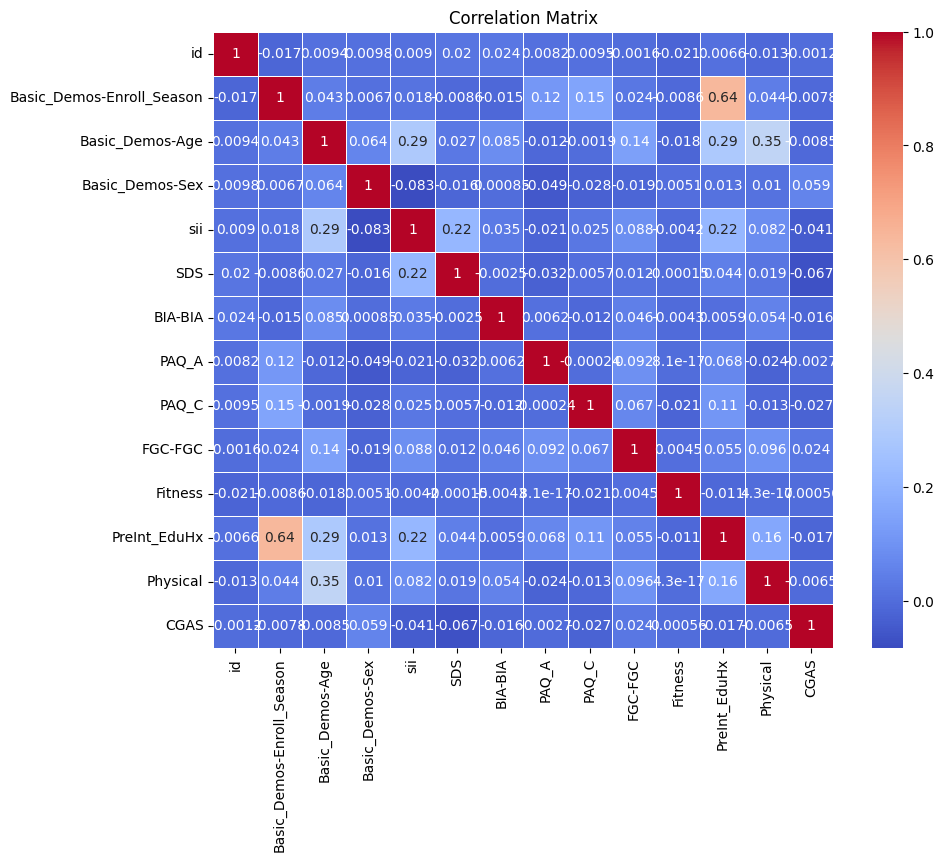

In [63]:

# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can plot the correlation matrix using seaborn for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [64]:
x=train_data.drop(columns=['sii'])

In [65]:
y=train_data['sii']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
catboost_model = CatBoostRegressor(silent=True, random_state=42)
lgbm_model = lgb.LGBMRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit models
rf_model.fit(x_train, y_train)
catboost_model.fit(x_train, y_train)
lgbm_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)
y_pred_catboost = catboost_model.predict(x_test)
y_pred_lgbm = lgbm_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 3168, number of used features: 13
[LightGBM] [Info] Start training from score 0.577620


In [68]:
train_data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,sii,SDS,BIA-BIA,PAQ_A,PAQ_C,FGC-FGC,Fitness,PreInt_EduHx,Physical,CGAS
0,0,0,5,0,2.000000,33.448196,155.732999,1.897847,2.078621,6.999773,10.335927,1.500000,57.443972,27.000000
1,1,2,9,0,0.000000,36.666667,155.406141,1.897847,1.170000,6.999773,10.335927,1.000000,49.629449,33.447955
2,2,2,10,1,0.000000,30.666667,216.091115,1.897847,2.085000,5.593333,11.250000,2.000000,57.443972,35.500000
3,3,3,9,0,1.000000,26.000000,198.710961,1.897847,2.725500,6.999773,13.500000,1.500000,57.443972,35.500000
4,4,1,18,1,0.580409,33.448196,216.091115,1.520000,2.078621,6.999773,10.335927,1.280521,57.443972,33.447955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,3955,0,13,0,1.000000,29.333333,211.878991,1.897847,3.130000,6.660000,10.335927,0.500000,57.443972,30.500000
3956,3956,3,10,0,0.580409,33.448196,216.091115,1.897847,2.670000,6.999773,10.335927,1.500000,54.083085,33.447955
3957,3957,0,11,0,1.000000,45.333333,214.956851,1.897847,2.864500,6.286667,10.335927,0.000000,57.443972,34.500000
3958,3958,1,13,0,0.000000,27.000000,282.534744,1.897847,2.150000,6.999773,10.335927,1.000000,57.443972,35.500000


In [69]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Convert continuous predicted values to ordinal categories
y_pred_rf_rounded = np.round(y_pred_rf).astype(int)
y_pred_catboost_rounded = np.round(y_pred_catboost).astype(int)
y_pred_lgbm_rounded = np.round(y_pred_lgbm).astype(int)
y_pred_xgb_rounded = np.round(y_pred_xgb).astype(int)

# Ensure that y_test is also integer
y_test_ordinal = y_test.astype(int)

# Calculate QWK for each model
qwk_rf = cohen_kappa_score(y_test_ordinal, y_pred_rf_rounded, weights='quadratic')
qwk_catboost = cohen_kappa_score(y_test_ordinal, y_pred_catboost_rounded, weights='quadratic')
qwk_lgbm = cohen_kappa_score(y_test_ordinal, y_pred_lgbm_rounded, weights='quadratic')
qwk_xgb = cohen_kappa_score(y_test_ordinal, y_pred_xgb_rounded, weights='quadratic')

print(f"Random Forest QWK: {qwk_rf}")
print(f"CatBoost QWK: {qwk_catboost}")
print(f"LightGBM QWK: {qwk_lgbm}")
print(f"XGBoost QWK: {qwk_xgb}")


Random Forest QWK: 0.12436260623229456
CatBoost QWK: 0.20171428571428573
LightGBM QWK: 0.16604797258709314
XGBoost QWK: 0.18075564011959777


In [70]:
test_data=pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


In [72]:
train_data=pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [73]:
train_data.isnull().sum()

id                                         0
Basic_Demos-Enroll_Season                  0
Basic_Demos-Age                            0
Basic_Demos-Sex                            0
CGAS-Season                               10
CGAS-CGAS_Score                           12
Physical-Season                            6
Physical-BMI                               7
Physical-Height                            7
Physical-Weight                            7
Physical-Waist_Circumference              15
Physical-Diastolic_BP                      9
Physical-HeartRate                         8
Physical-Systolic_BP                       9
Fitness_Endurance-Season                  16
Fitness_Endurance-Max_Stage               17
Fitness_Endurance-Time_Mins               17
Fitness_Endurance-Time_Sec                17
FGC-Season                                 3
FGC-FGC_CU                                 7
FGC-FGC_CU_Zone                            7
FGC-FGC_GSND                              15
FGC-FGC_GS

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['SDS-Season']=le.fit_transform(train_data['SDS-Season'])
train_data['PreInt_EduHx-Season']=le.fit_transform(train_data['PreInt_EduHx-Season'])
train_data['PAQ_C-Season']=le.fit_transform(train_data['PAQ_C-Season'])
train_data['PAQ_A-Season']=le.fit_transform(train_data['PAQ_A-Season'])
train_data['BIA-Season']=le.fit_transform(train_data['BIA-Season'])
train_data['FGC-Season']=le.fit_transform(train_data['FGC-Season'])
train_data['Fitness_Endurance-Season']=le.fit_transform(train_data['Fitness_Endurance-Season'])
train_data['Physical-Season']=le.fit_transform(train_data['Physical-Season'])
train_data['CGAS-Season']=le.fit_transform(train_data['CGAS-Season'])
train_data['Basic_Demos-Enroll_Season']=le.fit_transform(train_data['Basic_Demos-Enroll_Season'])
train_data['id']=le.fit_transform(train_data['id'])


In [75]:
train_data['SDS']=(train_data['SDS-Season']+train_data['SDS-SDS_Total_Raw']+train_data['SDS-SDS_Total_T'])/3
train_data=train_data.drop(columns=["SDS-Season",'SDS-SDS_Total_Raw','SDS-SDS_Total_T'])
train_data['BIA-BIA']=(train_data['BIA-Season']+train_data['BIA-BIA_TBW']+train_data['BIA-BIA_SMM']+train_data['BIA-BIA_LST']+train_data['BIA-BIA_LDM']+train_data['BIA-BIA_ICW']+train_data['BIA-BIA_Frame_num']+train_data['BIA-BIA_Fat']+train_data['BIA-BIA_FMI']+train_data['BIA-BIA_FFM']+train_data['BIA-BIA_ECW']+train_data['BIA-BIA_DEE']+train_data['BIA-BIA_BMR']+train_data['BIA-BIA_BMI']+train_data['BIA-BIA_BMC']+train_data['BIA-BIA_Activity_Level_num']+train_data['BIA-BIA_FFMI'])/17
train_data=train_data.drop(columns=['BIA-Season','BIA-BIA_TBW','BIA-BIA_SMM','BIA-BIA_LST','BIA-BIA_LDM','BIA-BIA_ICW','BIA-BIA_Frame_num','BIA-BIA_Fat','BIA-BIA_FMI','BIA-BIA_FFM','BIA-BIA_ECW','BIA-BIA_DEE','BIA-BIA_BMR','BIA-BIA_BMI','BIA-BIA_BMC','BIA-BIA_Activity_Level_num'])
train_data['PAQ_A']=(train_data['PAQ_A-Season']+train_data['PAQ_A-PAQ_A_Total'])/2
train_data['PAQ_C']=(train_data['PAQ_C-Season']+train_data['PAQ_C-PAQ_C_Total'])/2
train_data=train_data.drop(columns=["PAQ_A-Season",'PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total','PAQ_C-Season'])
train_data['FGC-FGC']=(train_data['FGC-FGC_TL_Zone']+train_data['FGC-FGC_TL']+train_data['FGC-FGC_SRR_Zone']+train_data['FGC-FGC_SRR']+train_data['FGC-FGC_SRL_Zone']+train_data['FGC-FGC_SRL']+train_data['FGC-FGC_PU_Zone']+train_data['FGC-FGC_PU']+train_data['FGC-FGC_GSD_Zone']+train_data['FGC-FGC_GSD']+train_data['FGC-FGC_GSND_Zone']+train_data['FGC-FGC_GSND']+train_data['FGC-FGC_CU_Zone']+train_data['FGC-FGC_CU']+train_data['FGC-Season'])/15
train_data=train_data.drop(columns=['FGC-FGC_CU_Zone','FGC-Season','FGC-FGC_CU','FGC-FGC_TL_Zone','FGC-FGC_TL','FGC-FGC_SRR_Zone','FGC-FGC_SRR','FGC-FGC_SRL_Zone','FGC-FGC_SRL','FGC-FGC_PU_Zone','FGC-FGC_PU','FGC-FGC_GSD_Zone','FGC-FGC_GSD','FGC-FGC_GSND_Zone','FGC-FGC_GSND'])
train_data=train_data.drop(columns=['BIA-BIA_FFMI'])
train_data['Fitness']=(train_data['Fitness_Endurance-Season']+train_data['Fitness_Endurance-Max_Stage']+train_data['Fitness_Endurance-Time_Mins']+train_data['Fitness_Endurance-Time_Sec'])/4
train_data['PreInt_EduHx']=(train_data['PreInt_EduHx-Season']+train_data['PreInt_EduHx-computerinternet_hoursday'])/2
train_data=train_data.drop(columns=['Fitness_Endurance-Season','Fitness_Endurance-Max_Stage','PreInt_EduHx-Season','PreInt_EduHx-computerinternet_hoursday','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec'])
train_data['Physical']=(train_data['Physical-Systolic_BP']+train_data['Physical-HeartRate']+train_data['Physical-Diastolic_BP']+train_data['Physical-Weight']+train_data['Physical-Waist_Circumference']+train_data['Physical-Height']+train_data['Physical-BMI']+train_data['Physical-Season'])/8
train_data['CGAS']=(train_data['CGAS-CGAS_Score']+train_data['CGAS-Season'])/2
train_data=train_data.drop(columns=['Physical-Systolic_BP','Physical-HeartRate','CGAS-CGAS_Score','CGAS-Season','Physical-Diastolic_BP','Physical-Weight','Physical-Waist_Circumference','Physical-Height','Physical-BMI','Physical-Season'])

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20 non-null     int64  
 1   Basic_Demos-Enroll_Season  20 non-null     int64  
 2   Basic_Demos-Age            20 non-null     int64  
 3   Basic_Demos-Sex            20 non-null     int64  
 4   SDS                        10 non-null     float64
 5   BIA-BIA                    8 non-null      float64
 6   PAQ_A                      1 non-null      float64
 7   PAQ_C                      9 non-null      float64
 8   FGC-FGC                    5 non-null      float64
 9   Fitness                    3 non-null      float64
 10  PreInt_EduHx               16 non-null     float64
 11  Physical                   4 non-null      float64
 12  CGAS                       8 non-null      float64
dtypes: float64(9), int64(4)
memory usage: 2.2 KB


In [78]:
si=KNNImputer(n_neighbors=5)
train_data['CGAS']=si.fit_transform(train_data[['CGAS']])
train_data['Physical']=si.fit_transform(train_data[['Physical']])
train_data['PreInt_EduHx']=si.fit_transform(train_data[['PreInt_EduHx']])
train_data['Fitness']=si.fit_transform(train_data[['Fitness']])
train_data['FGC-FGC']=si.fit_transform(train_data[['FGC-FGC']])
train_data['PAQ_C']=si.fit_transform(train_data[['PAQ_C']])
train_data['PAQ_A']=si.fit_transform(train_data[['PAQ_A']])
train_data['BIA-BIA']=si.fit_transform(train_data[['BIA-BIA']])
train_data['SDS']=si.fit_transform(train_data[['SDS']])

In [79]:
y_pred_rf = rf_model.predict(train_data)
y_pred_catboost = catboost_model.predict(train_data)
y_pred_lgbm = lgbm_model.predict(train_data)
y_pred_xgb = xgb_model.predict(train_data)

In [80]:
y_pred=(y_pred_rf+y_pred_catboost+y_pred_lgbm+y_pred_xgb)/4

In [84]:
y_pred

array([1.06867874, 0.35028929, 0.10795597, 0.6297586 , 0.86524889,
       0.95631986, 0.99791574, 0.61234482, 1.0976024 , 0.80992025,
       0.52478557, 0.48971869, 1.57845807, 0.7448949 , 0.91972372,
       1.22926722, 0.03162963, 0.29178805, 0.3237456 , 0.63656609])

In [89]:
y_pred = y_pred.astype(int)

In [90]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [95]:
train_data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,SDS,BIA-BIA,PAQ_A,PAQ_C,FGC-FGC,Fitness,PreInt_EduHx,Physical,CGAS
0,0,0,5,0,30.200000,155.732999,0.52,1.908389,5.620000,11.75,1.500,52.321426,27.0000
1,1,2,9,0,36.666667,155.347317,0.52,1.170000,5.620000,11.75,1.000,49.629449,32.0625
2,2,2,10,1,30.666667,195.106477,0.52,2.085000,5.593333,11.25,2.000,52.321426,35.5000
3,3,3,9,0,26.000000,198.652138,0.52,2.725500,5.620000,13.50,1.500,52.321426,35.5000
4,4,1,18,1,30.200000,195.106477,0.52,1.908389,5.620000,11.75,1.375,52.321426,32.0625
5,5,1,13,1,32.666667,224.197468,0.52,2.555000,5.960000,11.75,0.500,52.321426,26.5000
6,6,0,10,0,23.333333,193.004507,0.52,3.335000,5.620000,11.75,1.500,52.321426,32.0625
7,7,0,10,1,30.200000,200.363318,0.52,0.635000,2.046667,11.75,1.000,58.038911,32.0625
8,8,2,15,0,30.200000,195.106477,0.52,1.908389,5.620000,11.75,2.000,52.321426,32.0625
9,9,2,19,1,30.200000,195.106477,0.52,1.908389,5.620000,11.75,1.375,52.321426,32.0625


In [98]:
data=pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")

In [99]:
submission = pd.DataFrame({
    'id': data['id'],  # Replace 'id' with the appropriate column from your test data
    'sii': y_pred
})

In [100]:
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.
